In [16]:
# imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import time
import numpy as np
import matplotlib.pyplot as plt
import json, os

# define constants
m_index = 0
pt_index = 1
pz_index = 2
num_attr = 3
EPOCHS = 1000

In [17]:
# load config file
config = json.load(open("../config/nn_test_v1.json"))
events = json.load(open(config["FILES"]["events"]))
num_train = config["NUM"]["train"]
num_test = config["NUM"]["test"]
couplings = config["COUPLINGS"]
ckeys = couplings.keys()
kernel_l = config["MODEL_PARAM"]["kernel_l"]
nro = config["MODEL_PARAM"]["nro"]
a = config["MODEL_PARAM"]["a"]

In [18]:
# make sure the number of events you want don't exceed the total number of events
if num_train + num_test > len(events):
    print("the size of the training and test sets you input is greater than the number of data points available. please try again.")
    exit()

In [19]:
# define custom callback
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs = None):
        #keys = list(logs.keys())
        print("Starting training") #; got log keys: {}".format(keys))

    def on_train_end(self, logs = None):
        keys = list(logs.keys())
        print("Stop training") # ; got log keys: {}".format(keys))
        for key in keys:
            print ("log key = {}, val = {}".format(key, logs[key]))

    def on_epoch_begin(self, epoch, logs = None):
        #keys = list(logs.keys())
        if epoch % 50 == 0:
            print("Start epoch {} of training".format(epoch))

    def on_epoch_end(self, epoch, logs = None):
        keys = list(logs.keys())
        if epoch % 50 == 0:
            print("End epoch {} of training".format(epoch))
        #for key in keys:
        #    print ("log key = {}, val = {}".format(key, logs[key]))

    def on_test_begin(self, logs = None):
        keys = list(logs.keys())
#         print("Start testing; got log keys: {}".format(keys))

    def on_test_end(self, logs = None):
        keys = list(logs.keys())
#         print("Stop testing; got log keys: {}".format(keys))

    def on_predict_begin(self, logs = None):
        keys = list(logs.keys())
#         print("Start predicting; got log keys: {}".format(keys))

    def on_predict_end(self, logs = None):
        keys = list(logs.keys())
#         print("Stop predicting; got log keys: {}".format(keys))

    def on_train_batch_begin(self, batch, logs = None):
        keys = list(logs.keys())
#         print("...Training: start of batch {}; got log keys: {}".format(batch, keys))

    def on_train_batch_end(self, batch, logs = None):
        keys = list(logs.keys())
#         print("...Training: end of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_begin(self, batch, logs = None):
        keys = list(logs.keys())
#         print("...Evaluating: start of batch {}; got log keys: {}".format(batch, keys))

    def on_test_batch_end(self, batch, logs = None):
        keys = list(logs.keys())
#         print("...Evaluating: end of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_begin(self, batch, logs = None):
        keys = list(logs.keys())
#         print("...Predicting: start of batch {}; got log keys: {}".format(batch, keys))

    def on_predict_batch_end(self, batch, logs = None):
        keys = list(logs.keys())
#         print("...Predicting: end of batch {}; got log keys: {}".format(batch, keys))

In [20]:
def norm(x, m, sd):
    return (x - m) / sd

def build_model():
    model = keras.Sequential([ layers.Dense(128,  activation = "relu", input_shape = [num_attr]), 
                               layers.Dense(64, activation = "relu"),
                               layers.Dense(32, activation = "relu"),
                               layers.Dense(16, activation = "relu"),
                               layers.Dense(8,  activation = "relu"),
                               layers.Dense(1)] )
    return model

----------------------------------------------------------------------
coupling 1 of 1:
	input coupling of: M15K100
	output coupling of: M15K010
creating
	training dataset with 5000 events
	testing dataset with 1000 events
Starting training
Start epoch 0 of training
End epoch 0 of training
Start epoch 50 of training
End epoch 50 of training
Start epoch 100 of training
End epoch 100 of training
Start epoch 150 of training
End epoch 150 of training
Start epoch 200 of training
End epoch 200 of training
Start epoch 250 of training
End epoch 250 of training
Start epoch 300 of training
End epoch 300 of training
Start epoch 350 of training
End epoch 350 of training
Start epoch 400 of training
End epoch 400 of training
Start epoch 450 of training
End epoch 450 of training
Start epoch 500 of training
End epoch 500 of training
Start epoch 550 of training
End epoch 550 of training
Start epoch 600 of training
End epoch 600 of training
Start epoch 650 of training
End epoch 650 of training
Start epo

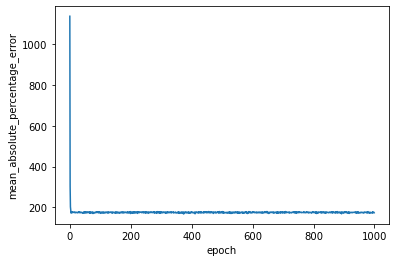

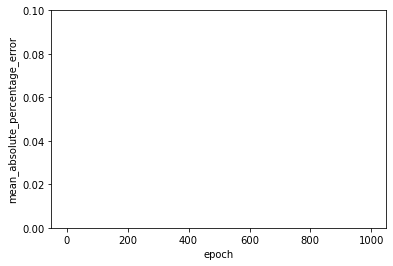

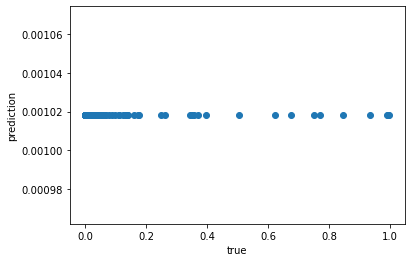

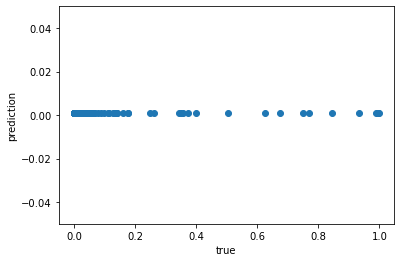

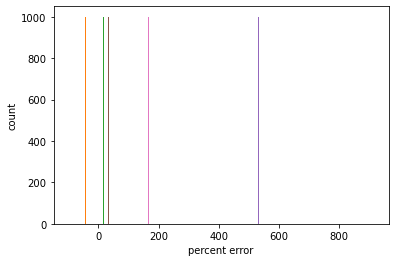

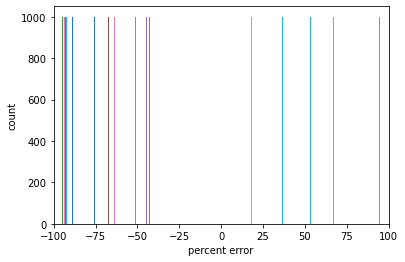

In [21]:
# neutal network training
counter = 0
for ckey in ckeys:
    print("----------------------------------------------------------------------")

    start = time()

    # define input and output coupling
    input_coupling = "M%2dK%03d" % (couplings[ckey]["Mi"], couplings[ckey]["Ki"])
    output_coupling = "M%2dK%03d" % (couplings[ckey]["Mf"], couplings[ckey]["Kf"])

    # define save directory
    save_dir = "../data/plots/nn/" + input_coupling + "to" + output_coupling + "_ntr" + str(num_train) + "te" + str(num_test) + "_k" + str(kernel_l) + "_nro" + str(nro) + "_a" + str(a) + "/"

    # create save directory, unless it already exists
    if not os.path.isdir(save_dir):
        os.system("mkdir -p " + save_dir)

    # open runtime file
    f = open(save_dir + "runtimes.txt", "w")

    # print input and output couplings
    print("coupling " + ckey + " of " + str(len(ckeys)) + ":")
    print("\tinput coupling of: " + input_coupling)
    print("\toutput coupling of: " + output_coupling)

    f.write("coupling:\n")
    f.write("\tinput coupling of: " + input_coupling + "\n")
    f.write("\toutput coupling of: " + output_coupling + "\n")

    # creating training and testing datasets
    print("creating")
    print("\ttraining dataset with " + str(num_train) + " events")
    print("\ttesting dataset with " + str(num_test) + " events")

    f.write("creating\n")
    f.write("\ttraining dataset with " + str(num_train) + " events\n")
    f.write("\ttesting dataset with " + str(num_test) + " events\n")

    ev_num_train = []
    X_train = []
    y_train = []
    ev_num_test = []
    X_test = []
    y_test = []

    for i in range(num_train + num_test):
        e = events[str(i)]
        Top = e["2"]
        # _4vector = ROOT.TLorentzVector()
        # _4vector.SetPxPyPzE(Top["px"], Top["py"], Top["pz"], Top["e"])
        px, py, pz, E, m = Top["px"], Top["py"], Top["pz"], Top["e"], Top["m"]
        pt = (px**2 + py**2)**0.5
        
        if i < num_train:
            ev_num_train.append(i)
            X_train.append([m/1000., pt/1000., pz/1000.])
            y_train.append(e["wts"][output_coupling] / e["wts"][input_coupling])
        else:
            ev_num_test.append(i)
            X_test.append([m/1000., pt/1000., pz/1000.])
            y_test.append(e["wts"][output_coupling] / e["wts"][input_coupling])

    # normalize data
#     X_train_m = sum(X_train) / len(X_train)
#     X_train_sd = (sum([((x - X_train_m) ** 2) for x in X_train]) / len(X_train)) ** 0.5
#     X_train_norm = norm(X_train, X_train_m, X_train_sd)

#     X_test_m = sum(X_test) / len(X_test)
#     X_test_sd = (sum([((x - X_test_m) ** 2) for x in X_test]) / len(X_test)) ** 0.5
#     X_test_norm = norm(X_test, X_test_m, X_test_sd)

    # convert to numpy arrays
    X_train = np.array(X_train)
#     X_train_norm = np.array(X_train_norm)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
#     X_test_norm = np.array(X_test_norm)
    y_test = np.array(y_test)

    # define model
    model = build_model()
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss = keras.losses.MeanAbsolutePercentageError(), 
                  optimizer = optimizer, 
                  metrics = [tf.keras.metrics.MeanAbsolutePercentageError()])
    

    # model.summary()

    history = model.fit(X_train, y_train, epochs = EPOCHS, validation_split = 0.2, verbose = 0, callbacks = [CustomCallback()])
    # early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
    # history = model.fit(X_train_norm, y_train, epochs = EPOCHS, validation_split = 0.2, verbose = 0, callbacks = [early_stop, CustomCallback()])

    plt.figure(counter)
    counter += 1
    plt.plot(history.epoch, history.history["mean_absolute_percentage_error"])
    plt.xlabel("epoch")
    plt.ylabel("mean_absolute_percentage_error")

    # zoomed
    plt.figure(counter)
    counter += 1
    plt.plot(history.epoch, history.history["mean_absolute_percentage_error"])
    plt.ylim([0.0, 0.1])
    plt.xlabel("epoch")
    plt.ylabel("mean_absolute_percentage_error")
    
    loss, mape = model.evaluate(X_test, y_test, verbose = 2)
    print("Testing set Mean Abs Percentage Error: {:5.2f}".format(mape))
    
    y_predict = model.predict(X_test)

    plt.figure(counter)
    counter += 1
    plt.scatter(y_test, y_predict)
    plt.xlabel("true")
    plt.ylabel("prediction")

    # zoomed
    plt.figure(counter)
    counter += 1
    plt.scatter(y_test, y_predict)
    plt.ylim([-0.05, 0.05])
    plt.xlabel("true")
    plt.ylabel("prediction")
    
    error = (y_predict - y_test) / y_test * 100

    plt.figure(counter)
    counter += 1
    plt.hist(error, bins = 50)
    plt.xlabel("percent error")
    plt.ylabel("count")

    # zoomed
    plt.figure(counter)
    counter += 1
    plt.hist(error, bins = 50)
    plt.xlim([-100.0, 100.0])
    plt.xlabel("percent error")
    plt.ylabel("count")

    print("runtime: " + str(time() - start))

In [22]:
y_test[0:10]

array([0.00033493, 0.00023149, 0.00011121, 0.00069422, 0.00479384,
       0.02147419, 0.00034688, 0.00063363, 0.00123853, 0.0002741 ])

In [23]:
y_predict[0:10]

array([[0.00101822],
       [0.00101822],
       [0.00101822],
       [0.00101822],
       [0.00101822],
       [0.00101822],
       [0.00101822],
       [0.00101822],
       [0.00101822],
       [0.00101822]], dtype=float32)